C:\Users\agust\AppData\Local\Temp\ipykernel_27352\4043558761.py:16: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  print(data.getCaseNumber()) #Numero de casos a analizar por el montecarlo
C:\Users\agust\AppData\Local\Temp\ipykernel_27352\4043558761.py:18: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  for i in range(0, data.getCaseNumber() - 1):


501


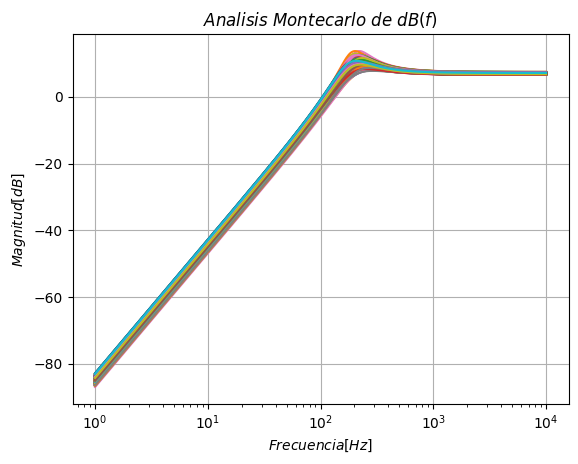

(array([0.03367651, 0.        , 0.06735303, 0.        , 0.        ,
        0.03367651, 0.        , 0.10102954, 0.06735303, 0.        ,
        0.20205909, 0.13470606, 0.        , 0.06735303, 0.13470606,
        0.06735303, 0.13470606, 0.16838257, 0.26941212, 0.20205909,
        0.16838257, 0.30308863, 0.37044166, 0.20205909, 0.26941212,
        0.20205909, 0.16838257, 0.33676514, 0.30308863, 0.2357356 ,
        0.33676514, 0.2357356 , 0.30308863, 0.53882423, 0.53882423,
        0.43779469, 0.2357356 , 0.40411817, 0.57250075, 0.53882423,
        0.2357356 , 0.63985377, 0.40411817, 0.43779469, 0.43779469,
        0.40411817, 0.30308863, 0.26941212, 0.40411817, 0.2357356 ,
        0.53882423, 0.33676514, 0.2357356 , 0.30308863, 0.16838257,
        0.20205909, 0.13470606, 0.2357356 , 0.53882423, 0.13470606,
        0.16838257, 0.13470606, 0.13470606, 0.10102954, 0.10102954,
        0.10102954, 0.10102954, 0.13470606, 0.13470606, 0.10102954,
        0.        , 0.06735303, 0.13470606, 0.  

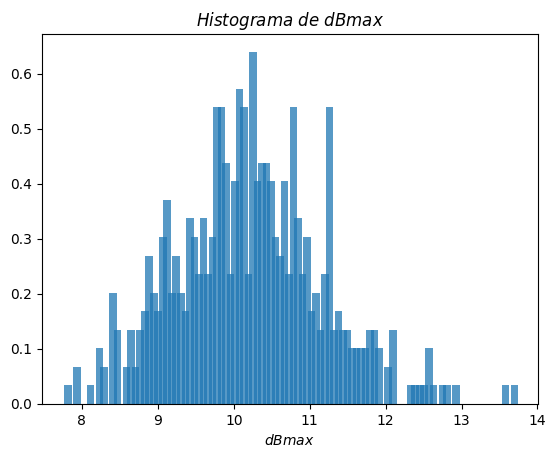

In [40]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt

#Arreglo para histograma
dBmax = []

#Nombre del archivo .raw
raw_file = "test.raw"

data = ltspice.Ltspice(raw_file)
data.parse()

#Obtengo los datos de frecuencia
frec = data.get_frequency()
print(data.getCaseNumber()) #Numero de casos a analizar por el montecarlo

for i in range(0, data.getCaseNumber() - 1):
    nodesVout = data.get_data ('V(n002)', i)
    nodesVin = data.get_data ('V(n003)', i)
    db = np.array(nodesVout) / np.array(nodesVin)

    dBmax.append(max(20*np.log10(db)))

    plt.semilogx(frec, 20*np.log10(db), label='Vout/Vin')

#Grafico de dB(f)
plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Magnitud [dB]$')
plt.title('$Analisis$ $Montecarlo$ $de$ $dB(f)$')
plt.grid(True)

plt.show()

#Grafico de histograma
plt.title('$Histograma$ $de$ $dBmax$')#Titulo
plt.xlabel('$dBmax$')#Etiqueta eje x

#Ancho de las barras
bin_width = 0.1

plt.hist(dBmax, width = bin_width , density= True ,bins=100, alpha=0.75)


